In [2]:
# Cài đặt pymoo
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210079 sha256=08794996e475fe9c62cc254e03db55365d3490b90ab0e0ca7cac33bccdf2b6b2
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from pymoo.operators.crossover import erx
from enum import Enum

np.random.seed(101039)
rng = np.random.default_rng()
sns.set_theme(style='whitegrid')

In [8]:
# Khởi tạo số lượng thành phố là 15
n_cities = 15

# Khởi tạo toạ độ của các thành phố
cities = np.random.rand(n_cities, 2)

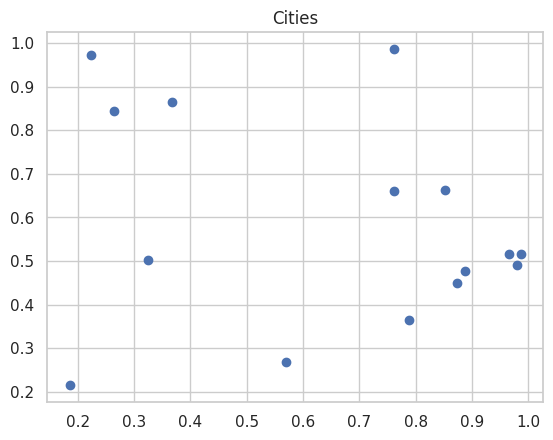

In [9]:
plt.scatter(cities[:, 0], cities[:, 1])
plt.title("Cities");

In [53]:
# Khởi tạo kích thước quần thể (population size)
n_population = 32 # Thực nghiệm với kích thước quần thể là 32

# Maximum number of evaluations
max_evaluations = 50000

# Khởi tạo quần thể là một mảng ngẫu nhiên với kích thước n_population cá thể (n_population = 32)
# Mỗi cá thể là một mảng, hoán vị các thành phố. Mỗi cá thể là cách di chuyển giữa n thành phố (n_cities = 15)
population = np.array([rng.permutation(n_cities) for i in range(n_population)])
population

array([[ 7, 14,  3,  9, 10, 13,  4, 12, 11,  0,  5,  8,  1,  6,  2],
       [ 9,  1,  2,  3, 14,  5,  6, 11,  4,  7,  0, 12, 13, 10,  8],
       [ 7,  2, 11,  9, 14,  5,  4,  6, 10,  1,  8,  3,  0, 13, 12],
       [13,  8,  1, 11,  3,  9,  6, 12,  7,  5,  2,  0, 14,  4, 10],
       [ 4, 13, 12,  5,  0,  2,  3, 10,  7, 14,  6,  8,  9,  1, 11],
       [ 6,  3, 11, 13,  7, 12, 14,  5,  1,  8,  4,  0,  9, 10,  2],
       [12,  9, 11,  4,  0,  3, 10,  5,  2, 13,  8, 14,  1,  6,  7],
       [12, 13,  0,  9, 10,  6,  5,  8,  2,  4, 11,  3,  1, 14,  7],
       [ 8, 12, 10,  7,  5,  2, 13,  3,  4, 11, 14,  6,  1,  0,  9],
       [ 9,  1, 14,  0,  8,  2,  4, 13, 11,  3, 12,  6,  5, 10,  7],
       [ 1,  9,  2, 12,  0,  6,  5,  8,  7, 10, 14, 13,  3,  4, 11],
       [ 0, 13,  9, 12,  1,  4,  5, 10,  6,  8,  2, 11,  3, 14,  7],
       [ 0, 10, 11, 14,  2,  4, 12,  3,  6,  7, 13,  8,  1,  9,  5],
       [ 9,  5,  8, 12,  6,  2,  3, 13, 10,  1, 11,  7,  0,  4, 14],
       [ 7,  4,  9,  3, 12,  8,  0

In [54]:
# Tính ma trận khoảng cách giữa các thành phố
distances = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(i):
        distances[i, j] = np.sqrt((cities[i, 0] - cities[j, 0])**2 + (cities[i,1] - cities[j, 1])**2)
        distances[j, i] = distances[i, j]
print("Distance matrix: ")
print(distances)

Distance matrix: 
[[0.         0.35425272 0.54969388 0.72684161 0.65563072 0.55294377
  0.2157753  0.13103093 0.83544815 0.24005966 0.11387167 0.12123693
  0.1134066  0.72772557 0.03083781]
 [0.35425272 0.         0.74396313 0.38713716 0.62926581 0.33851122
  0.4862133  0.48528329 0.78443438 0.43754296 0.46714279 0.23835588
  0.46727774 0.65289366 0.38060228]
 [0.54969388 0.74396313 0.         0.96293461 0.41373004 0.65414653
  0.3358873  0.5226535  0.5392151  0.32581271 0.54126509 0.62367729
  0.51363138 0.51762945 0.525938  ]
 [0.72684161 0.38713716 0.96293461 0.         0.67357035 0.31743607
  0.80338083 0.8555489  0.75770466 0.72856416 0.84055587 0.6199363
  0.83580184 0.6349339  0.74916142]
 [0.65563072 0.62926581 0.41373004 0.67357035 0.         0.36541628
  0.5255439  0.71162538 0.17994346 0.44434526 0.71732986 0.65382778
  0.69307831 0.10451545 0.64965019]
 [0.55294377 0.33851122 0.65414653 0.31743607 0.36541628 0.
  0.55320843 0.66353018 0.48153064 0.46662973 0.65612087 0.4839

In [55]:
# Cài đặt hàm tính tổng khoảng cách khi di chuyển qua tất cả thành phố của 1 cá thể (1 cá thể là 1 hoán vị cách di chuyển)
def total_distance(order, distances):
    # order: cá thể, distances: ma trận khoảng cách đã tính
    total = 0
    for i in range(1, len(order)):
        total += distances[order[i-1], order[i]]
    total += distances[order[-1], order[0]] # Cộng thêm khoảng cách quay về thành phố đầu tiên
    return total

In [57]:
individual_first = population[0]
print("individual_first:" ,individual_first)
print("Distance of individual_first::", total_distance(individual_first, distances))

individual_first: [ 7 14  3  9 10 13  4 12 11  0  5  8  1  6  2]
Distance of individual_first:: 6.9751046201367854


In [58]:
# Evaluate function
# Hàm lượng giá cho quần thể
# Giá trị trả về: Mảng fitness - mỗi phần tử là fitness của từng cá thể trong quần thể

def evaluate(population, distances):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        fitness[i] = total_distance(population[i], distances)
    return fitness

In [59]:
# Tính fitness của quần thể hiện tại (quần thể gốc)
fitness = evaluate(population, distances)

print("Minimum: ", np.argmin(fitness), ": ", population[np.argmin(fitness)], "fitness: ", np.min(fitness))

Minimum:  24 :  [14 12 10  0  3  4  5  2 11  9  7  6 13  8  1] fitness:  5.953457192626393


In [60]:
# Tournament Selection (Chọn lọc cạnh tranh)
# Chia các cá thể thành từng nhóm nhỏ theo t_size, từ đó chọn ra cá thể tốt nhất trong nhóm.
# Cá thể tốt nhất là cá thể có fitness nhỏ nhất (tổng khoảng cách nhỏ nhất)

def tournament_selection(population, fitness, t_size=4):
    rng = np.random.default_rng()

    tournament = rng.choice(len(population), size=t_size)

    ind = tournament[np.argmin(fitness[tournament])]

    return population[ind], fitness[ind]

In [61]:
# Tìm cá thể tốt nhất trong quần thể và t_fit tương ứng của quần thể đó
elites, t_fit = tournament_selection(population, fitness)

print("elites ", elites, "fitness: ", t_fit)

elites  [ 8  0  6  1 14 10 11  7 13  5 12  2  9  4  3] fitness:  6.9934983424043


In [62]:
def mutate(ind):
  mutation_rate = 0.1  # xác xuất đột biến p
  r = np.random.rand()
  if r < mutation_rate:
    rng = np.random.default_rng()
    x = rng.choice(len(ind)-1)
    child = np.copy(ind)
    child[x] = ind[x+1]
    child[x+1] = ind[x]
    return child
  return ind

In [63]:
class VarianceType(Enum):
    CROSSOVER_ONLY = "crossover_only"
    CROSSOVER_MUTATE = "crossover_mutate"
    MUTATION_ONLY = "mutation_only"

In [64]:
def crossover(pop):
  num_individuals = len(pop)
  next_pop = []

  indices = np.arange(num_individuals)

  while len(next_pop) < len(population):
    np.random.shuffle(indices)

    for i in range(0, num_individuals, 2): # trong quần thể, bắt cặp 2 cá thể liền kề nhau (0,1); (2,3);,...
        idx1 = indices[i]
        idx2 = indices[i+1]

        parent1 = pop[idx1]
        parent2 = pop[idx2]

        child = erx.erx(parent1, parent2)
        next_pop.append(child)

  return next_pop

In [65]:
def variation(pop, type = "crossover_only"):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    if type in [VarianceType.CROSSOVER_ONLY, VarianceType.CROSSOVER_MUTATE]:
      offspring = crossover(pop)

    if type in [VarianceType.MUTATION_ONLY, VarianceType.CROSSOVER_MUTATE]:
      for i in range(len(offspring)):
        offspring[i] = mutate(offspring[i])

    # print("offspring ", offspring)
    return offspring

In [66]:
# Hàm so sánh độ thích nghi của 2 cá thể.
def better_fitness(fitness_1, fitness_2, minimization=True):
    if minimization:
        if fitness_1 < fitness_2:
            return True
    else:
        if fitness_1 > fitness_2:
            return True

    return False

In [67]:
def tournament_selection_POPOP(pop, pop_fitness, selection_size, tournament_size):
    num_individuals = len(pop) # lấy ra số lượng cá thể
    indices = np.arange(num_individuals) # khai báo mảng indices để lấy chỉ số của từng các cá thể
    selected_indices = [] # danh sách chứa các chỉ số của các cá thể được lựa chọn

    while len(selected_indices) < selection_size:
        # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể.
        np.random.shuffle(indices)

        # print("indices ", indices)

        for i in range(0, num_individuals, tournament_size): # quét qua số lượng cá thể trong quần thể và chia thành từng bảng đấu
            best_idx = i # cá thể tốt nhất
            for idx in range(1, tournament_size): # cho các cá thể trong bảng đấu với nhau, và chọn đứa có độ thích nghi tốt hơn
                if better_fitness(pop_fitness[indices[i+idx]], pop_fitness[indices[best_idx]]):
                    best_idx = i+idx
            selected_indices.append(indices[best_idx])

    selected_indices = np.array(selected_indices)

    return selected_indices

In [68]:
# Định nghĩa hàm GA - phiên bản POPOP

def POPOP(population, num_generations):
    # Khởi tạo quần thể
    pop = population
    pop_fitness = evaluate(population, distances)
    # print("#Gen 0:")
    # print("population: ")
    # print(population)
    # print(pop_fitness)

    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)
    tournament_size = 4

    min_fit_by_gens = []
    num_evaluations = 0

    for i in range(num_generations):
      if (num_evaluations > max_evaluations):
        break
      else:
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation(pop, VarianceType.CROSSOVER_ONLY)
        offspring_fitness = evaluate(offspring, distances)

        num_evaluations += len(offspring)

        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring)) # chồng quần thể cha mẹ và con cái lại với nhau thành quần thể pool
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện tournament selection trên quần thể pool
        pool_indices = tournament_selection_POPOP(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]

        min_fit_by_gens.append(np.min(pop_fitness))
        # print("#Gen {}:".format(i+1))
        # print(pop_fitness)
    # print("#Result:")
    # print(pop)
    # print(pop_fitness)
    print("Minimum: ", pop[np.argmin(pop_fitness)], "fitness: ", np.min(pop_fitness))
    print("min_fit_by_gens ", min_fit_by_gens)
    return pop[np.argmin(pop_fitness)], np.min(pop_fitness), min_fit_by_gens

Minimum:  [ 7 12  6  9  2  4 13  8  5  3  1 11 14  0 10] fitness:  3.020238993378037
min_fit_by_gens  [5.831715123635117, 5.519762437437675, 4.823292107519947, 4.677489070392714, 4.486612870333981, 4.3760422139853015, 3.640401089969714, 3.640401089969714, 3.640401089969714, 3.3076058526666716, 3.3076058526666716, 3.0202389933780376, 3.0202389933780376, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037, 3.020238993378037,

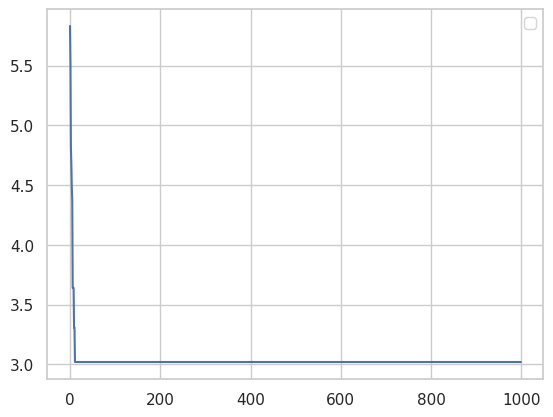

In [70]:
num_generations = 1000
min_pop, min_p_fit, min_fit_by_gens = POPOP(population, num_generations)
print("p_fit", min_fit_by_gens)
plt.plot(min_fit_by_gens)

### Thực nghiệm 10 trials với GA - POPOP - ERX CrossOver Only

Minimum:  [ 3  5 13  8  4  2  6  9 12  7 10  0 14 11  1] fitness:  3.0375899793398426
min_fit_by_gens  [5.953457192626393, 5.6065171029175955, 4.736371624855397, 4.7079865401059475, 4.254815137129275, 4.254815137129275, 4.1997056955007, 3.9054629719056173, 3.74256685212977, 3.70331567525663, 3.4140624200827965, 3.4140624200827965, 3.0802551852837143, 3.0802551852837143, 3.037589979339843, 3.037589979339843, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899793398426, 3.0375899

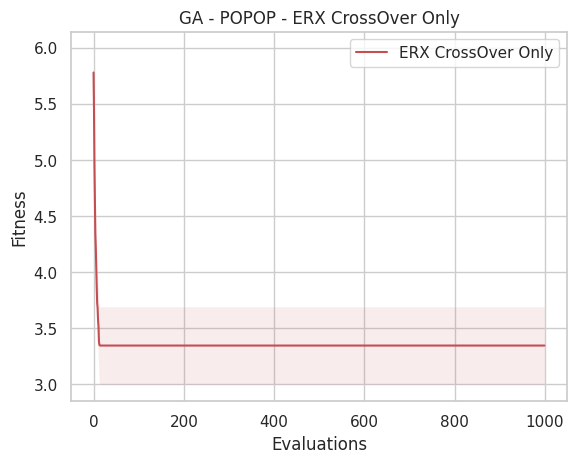

In [71]:
n_trials = 10
num_generations = 1000

fits = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits.append(min_fit_by_gens)

μ_1 = np.mean(fits, axis=0)
σ_1 = np.std(fits, axis=0)

plt.plot(μ_1, label="ERX CrossOver Only", color='r')
plt.fill_between(np.arange(0, len(fits[0])), μ_1+σ_1, μ_1-σ_1, facecolor='r', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"GA - POPOP - ERX CrossOver Only")
plt.legend();

### Thực nghiệm 10 trials với GA - POPOP - ERX CrossOver + Mutation

In [75]:
# GA - POPOP_CrossoverMutation
# Định nghĩa hàm POPOP_CrossoverMutation

def POPOP_CrossoverMutation(population, num_generations):
    # Khởi tạo quần thể
    pop = population
    pop_fitness = evaluate(population, distances)

    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)
    tournament_size = 4

    min_fit_by_gens = []
    num_evaluations = 0

    for i in range(num_generations):
      if (num_evaluations > max_evaluations):
        break
      else:
        # print("#Gen : ", i)
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation(pop, VarianceType.CROSSOVER_MUTATE)
        offspring_fitness = evaluate(offspring, distances)

        num_evaluations += len(offspring)

        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring)) # chồng quần thể cha mẹ và con cái lại với nhau thành quần thể pool
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện tournament selection trên quần thể pool
        pool_indices = tournament_selection_POPOP(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]

        min_fit_by_gens.append(np.min(pop_fitness))

    print("Minimum: ", pop[np.argmin(pop_fitness)], "fitness: ", np.min(pop_fitness))

    return pop[np.argmin(pop_fitness)], np.min(pop_fitness), min_fit_by_gens

Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  1000
Minimum:  [ 3  5 13  8  4  2  9  6  7 10 12 14  0 11  1] fitness:  2.927537900722987
min_fit_by_gens  1000
Minimum:  [10  7  6  9  2  5  4  8 13  3  1 11  0 14 12] fitness:  3.5015600183739846
min_fit_by_gens  1000
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  1000
Minimum:  [11  0 10  7 12 14  6  9  2  8 13  4  5  3  1] fitness:  3.0604840362663177
min_fit_by_gens  1000
Minimum:  [ 9 12 10  7  6  2  8 13  4  5  3  1 11  0 14] fitness:  3.3002030089028573
min_fit_by_gens  1000
Minimum:  [ 6 12 10  7  9 14  0 11  1  3  5  4 13  8  2] fitness:  3.304092288569656
min_fit_by_gens  1000
Minimum:  [ 3  5  4 13  8  2  9  6  7 10 12 14  0 11  1] fitness:  2.993702745172217
min_fit_by_gens  1000
Minimum:  [11  5 13  8  4  3  1  9  2  6 12  7 10 14  0] fitness:  3.7838879471770377
min_fit_by_gens  1000
Minimum:  [ 6  2  4  8 13  5  3

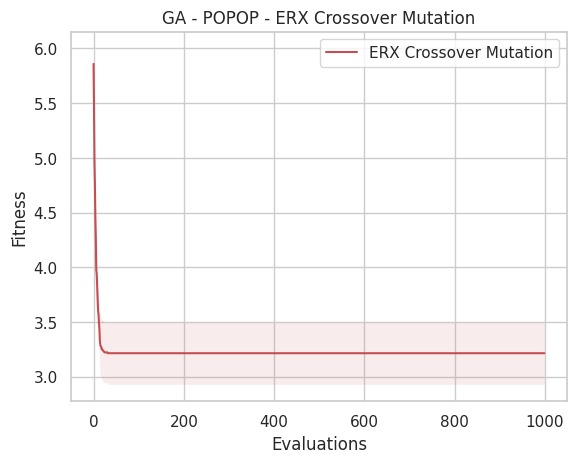

In [76]:
n_trials = 10
num_generations = 1000

fits_cm = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_CrossoverMutation(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_cm.append(min_fit_by_gens)

μ_2 = np.mean(fits_cm, axis=0)
σ_2 = np.std(fits_cm, axis=0)

plt.plot(μ_2, label="ERX Crossover Mutation", color='r')
plt.fill_between(np.arange(0, len(fits_cm[0])), μ_2+σ_2, μ_2-σ_2, facecolor='r', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"GA - POPOP - ERX Crossover Mutation")
plt.legend();


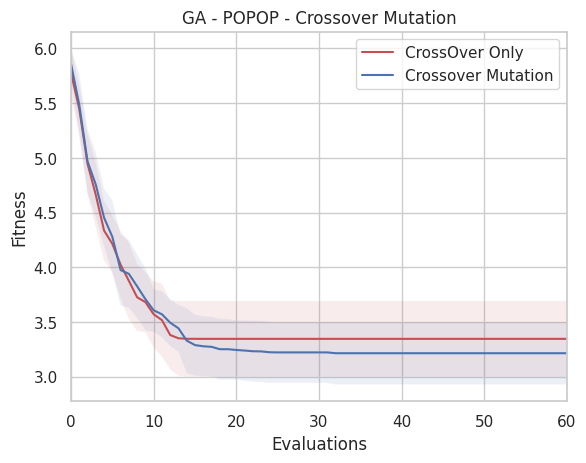

In [77]:
plt.plot(μ_1, label="CrossOver Only", color='r')
plt.fill_between(np.arange(0, len(fits[0])), μ_1+σ_1, μ_1-σ_1, facecolor='r', alpha=0.1)

plt.plot(μ_2, label="Crossover Mutation", color='b')
plt.fill_between(np.arange(0, len(fits_cm[0])), μ_2+σ_2, μ_2-σ_2, facecolor='b', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 60)
plt.title(f"GA - POPOP - Crossover Mutation")
plt.legend();

## Thực nghiệm với crossover khác - OX

In [78]:
def tsp_ox_crossover(parent1, parent2):
    n = len(parent1)

    # Choose two random crossover points
    cx1, cx2 = sorted(np.random.choice(n, 2, replace=False))

    # Initialize the child tour with placeholder values
    child = [-1] * n

    # Copy a slice from parent1 to the child
    child[cx1:cx2] = parent1[cx1:cx2]

    # Create a list of unused cities from parent2
    unused_cities = [city for city in parent2 if city not in child]

    # Iterate through the child tour and fill in missing cities from parent2
    idx = cx2
    for city in unused_cities:
        if child[idx] == -1:
            child[idx] = city
            idx = (idx + 1) % n

    return child

In [79]:
def crossover_OX(pop):
  num_individuals = len(pop)
  next_pop = []

  indices = np.arange(num_individuals)

  while len(next_pop) < len(population):
    np.random.shuffle(indices)

    for i in range(0, num_individuals, 2): # trong quần thể, bắt cặp 2 cá thể liền kề nhau (0,1); (2,3);,...
        idx1 = indices[i]
        idx2 = indices[i+1]

        parent1 = pop[idx1]
        parent2 = pop[idx2]

        child = tsp_ox_crossover(parent1, parent2)
        next_pop.append(child)

  return next_pop

In [80]:
def variation_OX(pop, type = "crossover_only"):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    if type in [VarianceType.CROSSOVER_ONLY, VarianceType.CROSSOVER_MUTATE]:
      offspring = crossover_OX(pop)

    if type in [VarianceType.MUTATION_ONLY, VarianceType.CROSSOVER_MUTATE]:
      for i in range(len(offspring)):
        offspring[i] = mutate(offspring[i])

    # print("offspring ", offspring)
    return offspring

In [81]:
# GA - POPOP
# Định nghĩa hàm POPOP

def POPOP_OX(population, num_generations):
    # Khởi tạo quần thể
    pop = population
    pop_fitness = evaluate(population, distances)

    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)
    tournament_size = 4

    min_fit_by_gens = []
    num_evaluations = 0

    for i in range(num_generations):
      if (num_evaluations > max_evaluations):
        break
      else:
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation_OX(pop, VarianceType.CROSSOVER_ONLY)
        offspring_fitness = evaluate(offspring, distances)

        num_evaluations += len(offspring)

        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring)) # chồng quần thể cha mẹ và con cái lại với nhau thành quần thể pool
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện tournament selection trên quần thể pool
        pool_indices = tournament_selection_POPOP(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]

        min_fit_by_gens.append(np.min(pop_fitness))
    print("Minimum: ", pop[np.argmin(pop_fitness)], "fitness: ", np.min(pop_fitness))
    print("min_fit_by_gens ", min_fit_by_gens)
    return pop[np.argmin(pop_fitness)], np.min(pop_fitness), min_fit_by_gens

Minimum:  [ 5  8 13  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.969755400116999
min_fit_by_gens  [5.79781576042268, 5.79781576042268, 5.331288407428867, 4.7202878961062895, 4.7202878961062895, 4.7202878961062895, 4.361090335201266, 3.9578111489426764, 3.9578111489426764, 3.9025215460766383, 3.9025215460766383, 3.9025215460766383, 3.9025215460766383, 3.772459894018017, 3.772459894018017, 3.7493239317941374, 3.7493239317941374, 3.7493239317941374, 3.7493239317941374, 3.5067711032894526, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.412301288182379, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206693672, 3.184753206

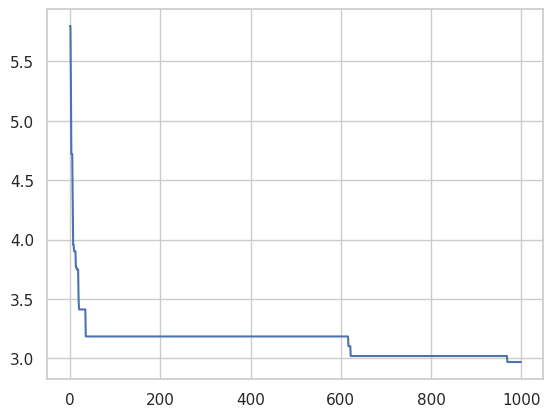

In [82]:
num_generations = 1000
min_pop, min_p_fit, min_fit_by_gens = POPOP_OX(population, num_generations)
print("p_fit", min_fit_by_gens)
plt.plot(min_fit_by_gens)

## Thực nghiệm với OX Crossover

Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  [5.709824476290892, 5.6825394679651975, 5.148678999089905, 4.4587744180776445, 4.4587744180776445, 4.322965361798484, 4.322965361798484, 4.322965361798484, 4.322965361798484, 3.9468521829100895, 3.9468521829100895, 3.9468521829100895, 3.9468521829100895, 3.9468521829100887, 3.9468521829100887, 3.9468521829100887, 3.9468521829100887, 3.8577467439938244, 3.8577467439938244, 3.8577467439938236, 3.765776640788613, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.617847827982737, 3.55999562040137, 3.5599956

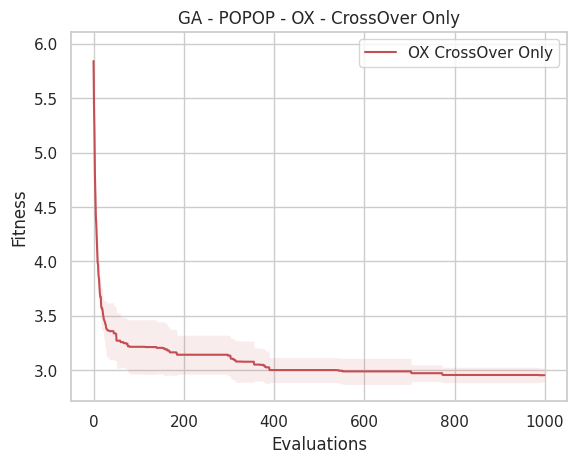

In [83]:
n_trials = 10
num_generations = 1000

fits_ox = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_OX(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_ox.append(min_fit_by_gens)

μ_3 = np.mean(fits_ox, axis=0)
σ_3 = np.std(fits_ox, axis=0)

plt.plot(μ_3, label="OX CrossOver Only", color='r')
plt.fill_between(np.arange(0, len(fits_ox[0])), μ_3+σ_3, μ_3-σ_3, facecolor='r', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"GA - POPOP - OX - CrossOver Only")
plt.legend();

## Thực nghiệm với OX Crossover + Mutation

In [84]:
# GA - POPOP_withMutation
# Định nghĩa hàm POPOP_withMutation

def POPOP_OX_CrossoverMutation(population, num_generations):
    # Khởi tạo quần thể
    pop = population
    pop_fitness = evaluate(population, distances)

    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)
    tournament_size = 4

    min_fit_by_gens = []
    num_evaluations = 0

    for i in range(num_generations):
      if (num_evaluations > max_evaluations):
        break
      else:
        # print("#Gen : ", i)
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation_OX(pop, VarianceType.CROSSOVER_MUTATE)
        offspring_fitness = evaluate(offspring, distances)

        num_evaluations += len(offspring)

        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring)) # chồng quần thể cha mẹ và con cái lại với nhau thành quần thể pool
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện tournament selection trên quần thể pool
        pool_indices = tournament_selection_POPOP(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]

        min_fit_by_gens.append(np.min(pop_fitness))

    print("Minimum: ", pop[np.argmin(pop_fitness)], "fitness: ", np.min(pop_fitness))

    return pop[np.argmin(pop_fitness)], np.min(pop_fitness), min_fit_by_gens

Minimum:  [12  6  9  2  4  8 13  5  3  1 11  0 14 10  7] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [11  0 14 10  7 12  6  9  2  4  8 13  5  3  1] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 8 13  5  3  1 11  0 14 10  7 12  6  9  2  4] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 1 11  0 14 10  7 12  6  9  2  4  8 13  5  3] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 3  1 11  0 14 12 10  7  6  9  2  4  8 13  5] fitness:  2.9275379007229874
min_fit_by_gens  1000
Minimum:  [ 3  5 13  8  4  2  9  6  7 10 12 14  0 11  1] fitness:  2.927537900722987
min_fit_by_gens  1000
Minimum:  [ 3  1 11  0 14 10  7 12  6  9  2  8 13  4  5] fitness:  2.9791260956358667
min_fit_by_gens  1000
Minimum:  [ 1 11  0 14 10  7 12  6  9  2  4  8 13  5  3] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 8 13  5  3  1 11  0 14 10  7 12  6  9  2  4] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 5 13  8  4  2  9  6 12 

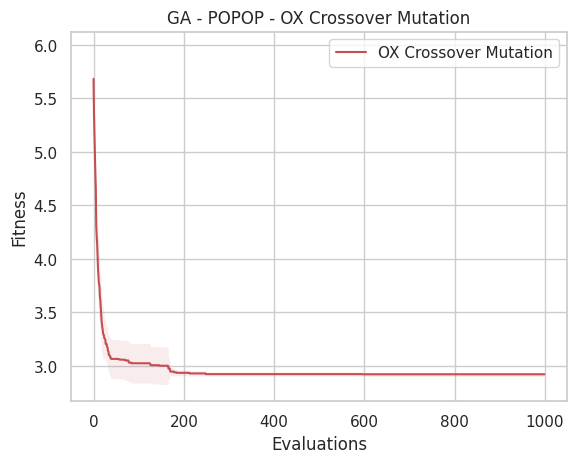

In [85]:
n_trials = 10
num_generations = 1000

fits_ox_m = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_OX_CrossoverMutation(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_ox_m.append(min_fit_by_gens)

μ_4 = np.mean(fits_ox_m, axis=0)
σ_4 = np.std(fits_ox_m, axis=0)

plt.plot(μ_4, label="OX Crossover Mutation", color='r')
plt.fill_between(np.arange(0, len(fits_ox_m[0])), μ_4+σ_4, μ_4-σ_4, facecolor='r', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"GA - POPOP - OX Crossover Mutation")
plt.legend();


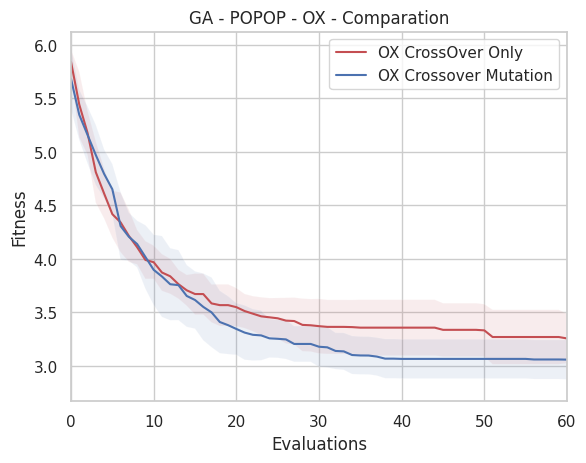

In [86]:
plt.plot(μ_3, label="OX CrossOver Only", color='r')
plt.fill_between(np.arange(0, len(fits_ox[0])), μ_3+σ_3, μ_3-σ_3, facecolor='r', alpha=0.1)

plt.plot(μ_4, label="OX Crossover Mutation", color='b')
plt.fill_between(np.arange(0, len(fits_ox_m[0])), μ_4+σ_4, μ_4-σ_4, facecolor='b', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 60)
plt.title(f"GA - POPOP - OX - Comparation")
plt.legend();

**Nhận xét:**
- Từ đồ thị có thể thấy được rằng, với việc sử dụng phép lai ghép OX cho kết quả tệ hơn so với khi kết hợp với phép đột biến.
- Độ lệch chuẩn của việc chỉ sử dụng phép lai ghép cũng có biên độ lớn hơn so với khi kết hợp với phép đột biến

## Thực nghiệm thay đổi phép đột biến

In [87]:
def tsp_reverse_mutation(ind):
    n = len(ind)
    rng = np.random.default_rng()

    # Chọn một vị trí ngẫu nhiên để bắt đầu đảo ngược
    start = rng.integers(0, n)

    # Chọn một đoạn ngẫu nhiên để đảo ngược
    length = rng.integers(2, n // 2)  # Đảm bảo có ít nhất 2 thành phần, nhưng không quá nửa đường đi

    # Tạo một bản sao của đường đi hiện tại
    child = np.copy(ind)

    # Đảo ngược phần được chọn
    for i in range(length // 2):
        pos1 = (start + i) % n
        pos2 = (start + length - 1 - i) % n
        child[pos1], child[pos2] = child[pos2], child[pos1]

    return child


In [88]:
def variation_OX_reverse_mutation(pop):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    offspring = crossover_OX(pop)

    for i in range(len(offspring)):
      offspring[i] = tsp_reverse_mutation(offspring[i])

    return offspring

In [89]:
# POPOP_OX_Crossover_Reverse_Mutation
# Định nghĩa hàm POPOP_OX_Crossover_Reverse_Mutation

def POPOP_OX_Crossover_Reverse_Mutation(population, num_generations):
    # Khởi tạo quần thể
    pop = population
    pop_fitness = evaluate(population, distances)

    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)
    tournament_size = 4

    min_fit_by_gens = []
    num_evaluations = 0

    for i in range(num_generations):
      if (num_evaluations > max_evaluations):
        break
      else:
        # print("#Gen : ", i)
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation_OX_reverse_mutation(pop)
        offspring_fitness = evaluate(offspring, distances)

        num_evaluations += len(offspring)

        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring)) # chồng quần thể cha mẹ và con cái lại với nhau thành quần thể pool
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện tournament selection trên quần thể pool
        pool_indices = tournament_selection_POPOP(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]

        min_fit_by_gens.append(np.min(pop_fitness))

    print("Minimum: ", pop[np.argmin(pop_fitness)], "fitness: ", np.min(pop_fitness))

    return pop[np.argmin(pop_fitness)], np.min(pop_fitness), min_fit_by_gens

Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  1000
Minimum:  [ 8 13  5  3  1 11  0 14 10  7 12  6  9  2  4] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 9  2  4  8 13  5  3  1 11  0 14 10  7 12  6] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 8 13  5  3  1 11  0 14 10  7 12  6  9  2  4] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 2  9  6 12  7 10 14  0 11  1  3  5 13  8  4] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 2  9  6 12  7 10 14  0 11  1  3  5 13  8  4] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 3  5 13  8  4  2  9  6  7 10 12 14  0 11  1] fitness:  2.927537900722987
min_fit_by_gens  1000
Minimum:  [ 3  1 11  0 14 10  7 12  6  9  2  4  8 13  5] fitness:  2.912961251186637
min_fit_by_gens  1000
Minimum:  [ 8  4  2  9  6  7 10 12 14  0 11  1  3  5 13] fitness:  2.927537900722988
min_fit_by_gens  1000
Minimum:  [ 3  1 11  0 14 10  7 12  

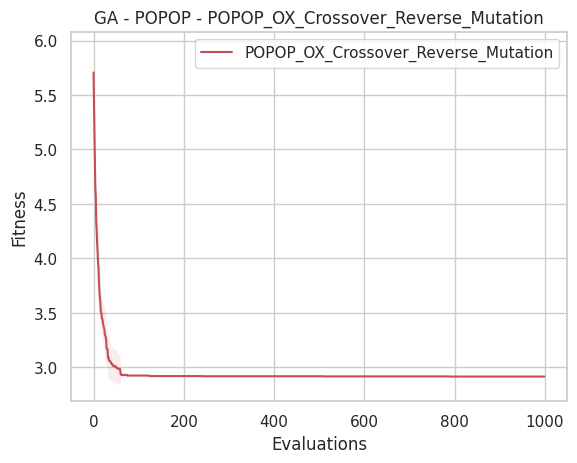

In [90]:
n_trials = 10
num_generations = 1000

fits_ox_rm = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_OX_Crossover_Reverse_Mutation(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_ox_rm.append(min_fit_by_gens)

μ_5 = np.mean(fits_ox_rm, axis=0)
σ_5 = np.std(fits_ox_rm, axis=0)

plt.plot(μ_5, label="POPOP_OX_Crossover_Reverse_Mutation", color='r')
plt.fill_between(np.arange(0, len(fits_ox_rm[0])), μ_5+σ_5, μ_5-σ_5, facecolor='r', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"GA - POPOP - POPOP_OX_Crossover_Reverse_Mutation")
plt.legend();


## So sánh

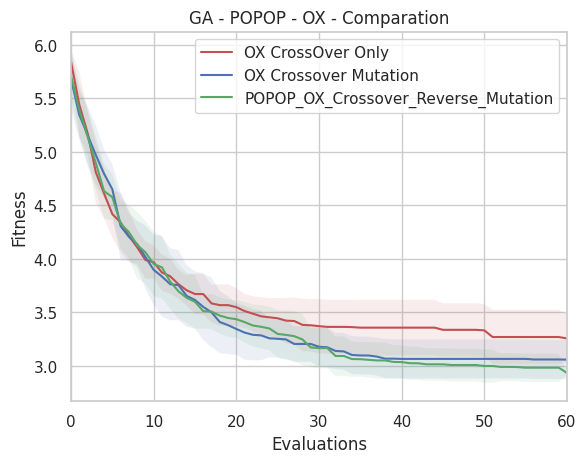

In [91]:
plt.plot(μ_3, label="OX CrossOver Only", color='r')
plt.fill_between(np.arange(0, len(fits_ox[0])), μ_3+σ_3, μ_3-σ_3, facecolor='r', alpha=0.1)

plt.plot(μ_4, label="OX Crossover Mutation", color='b')
plt.fill_between(np.arange(0, len(fits_ox_m[0])), μ_4+σ_4, μ_4-σ_4, facecolor='b', alpha=0.1)

plt.plot(μ_5, label="POPOP_OX_Crossover_Reverse_Mutation", color='g')
plt.fill_between(np.arange(0, len(fits_ox_rm[0])), μ_5+σ_5, μ_5-σ_5, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 60)
plt.title(f"GA - POPOP - OX - Comparation")
plt.legend();

**Nhận xét:**
- Từ đồ thị có thể thấy, qua việc thay đổi các phép đột biến và lai ghép, kết quả tương tự nhau (chênh lệch không quá lớn)

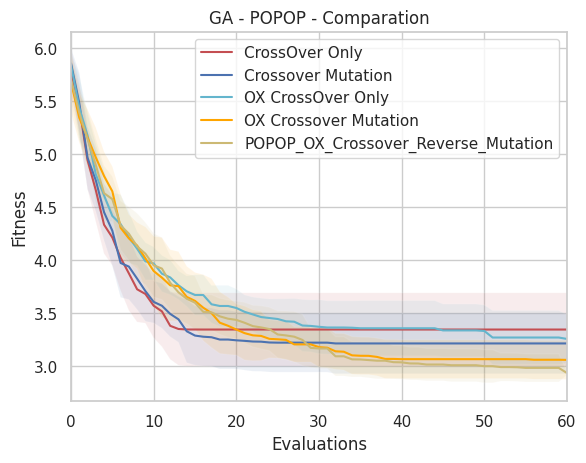

In [92]:
plt.plot(μ_1, label="CrossOver Only", color='r')
plt.fill_between(np.arange(0, len(fits[0])), μ_1+σ_1, μ_1-σ_1, facecolor='r', alpha=0.1)

plt.plot(μ_2, label="Crossover Mutation", color='b')
plt.fill_between(np.arange(0, len(fits_cm[0])), μ_2+σ_2, μ_2-σ_2, facecolor='b', alpha=0.1)

plt.plot(μ_3, label="OX CrossOver Only", color='c')
plt.fill_between(np.arange(0, len(fits_ox[0])), μ_3+σ_3, μ_3-σ_3, facecolor='c', alpha=0.1)

plt.plot(μ_4, label="OX Crossover Mutation", color='orange')
plt.fill_between(np.arange(0, len(fits_ox_m[0])), μ_4+σ_4, μ_4-σ_4, facecolor='orange', alpha=0.1)

plt.plot(μ_5, label="POPOP_OX_Crossover_Reverse_Mutation", color='y')
plt.fill_between(np.arange(0, len(fits_ox_rm[0])), μ_5+σ_5, μ_5-σ_5, facecolor='y', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 60)
plt.title(f"GA - POPOP - Comparation")
plt.legend();

## Thực nghiệm thay đổi kích thước quần thể

In [93]:
n_population = 256 # Thực nghiệm với kích thước quần thể là 256
population = np.array([rng.permutation(n_cities) for i in range(n_population)])

# ERX CrossOver

In [94]:
n_trials = 10
num_generations = 1000

fits_erx = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_erx.append(min_fit_by_gens)

μ_1 = np.mean(fits_erx, axis=0)
σ_1 = np.std(fits_erx, axis=0)

Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  [4.9217388236076225, 4.762366092009915, 4.051098360222388, 3.505840515143647, 3.505840515143647, 3.195200243734318, 3.1839086543137016, 2.980115633521123, 2.980115633521123, 2.9791260956358676, 2.9296320402600853, 2.912961251186637, 2.912961251186637, 2.912961251186637, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129612511866365, 2.9129

# ERX CrossOver + Mutation

In [95]:
n_trials = 10
num_generations = 1000

fits_erx_m = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_CrossoverMutation(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_erx_m.append(min_fit_by_gens)

μ_2 = np.mean(fits_erx_m, axis=0)
σ_2 = np.std(fits_erx_m, axis=0)


Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7

#OX CrossOver Only

In [96]:
n_trials = 10
num_generations = 1000

fits_ox = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_OX(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_ox.append(min_fit_by_gens)

μ_3 = np.mean(fits_ox, axis=0)
σ_3 = np.std(fits_ox, axis=0)

Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  [4.160244618735007, 4.160244618735007, 4.160244618735007, 4.13331492629213, 3.74071585675426, 3.74071585675426, 3.74071585675426, 3.232211704677699, 3.232211704677699, 3.232211704677699, 3.2268674595148195, 3.063962363657019, 3.063962363657019, 3.062366464212316, 3.062366464212316, 3.062366464212316, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.0439005350091666, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.043900535009166, 3.0439005

#OX CrossOver + Mutation

In [97]:
n_trials = 10
num_generations = 1000

fits_ox_m = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_OX_CrossoverMutation(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_ox_m.append(min_fit_by_gens)

μ_4 = np.mean(fits_ox_m, axis=0)
σ_4 = np.std(fits_ox_m, axis=0)

Minimum:  [11  0 14 10  7 12  6  9  2  4  8 13  5  3  1] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [11  0 14 10  7 12  6  9  2  4  8 13  5  3  1] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [12  6  9  2  4  8 13  5  3  1 11  0 14 10  7] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [12  6  9  2  4  8 13  5  3  1 11  0 14 10  7] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 1 11  0 14 10  7 12  6  9  2  4  8 13  5  3] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [ 9  2  4  8 13  5  3  1 11  0 14 10  7 12  6] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [ 8 13  5  3  1 11  0 14 10  7 12

#OX CrossOver + Reverse Mutation

In [98]:
n_trials = 10
num_generations = 1000

fits_ox_rm = []
for idx in range(n_trials):
  pop, p_fit, min_fit_by_gens = POPOP_OX_Crossover_Reverse_Mutation(population, num_generations)
  print("min_fit_by_gens ", len(min_fit_by_gens))
  fits_ox_rm.append(min_fit_by_gens)

μ_5 = np.mean(fits_ox_rm, axis=0)
σ_5 = np.std(fits_ox_rm, axis=0)

Minimum:  [12  6  9  2  4  8 13  5  3  1 11  0 14 10  7] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 6 12  7 10 14  0 11  1  3  5 13  8  4  2  9] fitness:  2.9129612511866374
min_fit_by_gens  196
Minimum:  [10 14  0 11  1  3  5 13  8  4  2  9  6 12  7] fitness:  2.9129612511866374
min_fit_by_gens  196
Minimum:  [ 9  2  4  8 13  5  3  1 11  0 14 10  7 12  6] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [ 6 12  7 10 14  0 11  1  3  5 13  8  4  2  9] fitness:  2.9129612511866374
min_fit_by_gens  196
Minimum:  [ 5 13  8  4  2  9  6 12  7 10 14  0 11  1  3] fitness:  2.9129612511866365
min_fit_by_gens  196
Minimum:  [ 9  2  4  8 13  5  3  1 11  0 14 10  7 12  6] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [11  0 14 10  7 12  6  9  2  4  8 13  5  3  1] fitness:  2.912961251186637
min_fit_by_gens  196
Minimum:  [ 2  9  6 12  7 10 14  0 11  1 

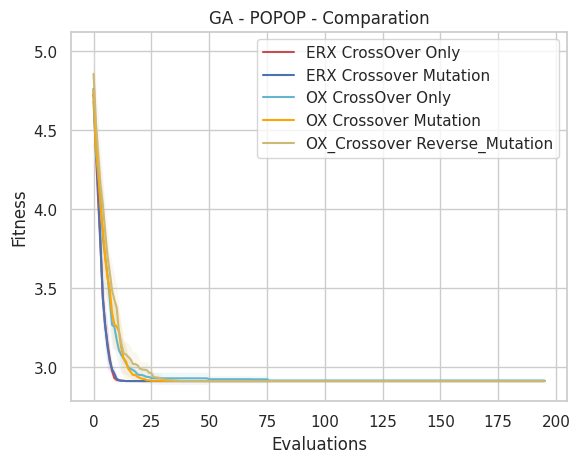

In [99]:
plt.plot(μ_1, label="ERX CrossOver Only", color='r')
plt.fill_between(np.arange(0, len(fits_erx[0])), μ_1+σ_1, μ_1-σ_1, facecolor='r', alpha=0.1)

plt.plot(μ_2, label="ERX Crossover Mutation", color='b')
plt.fill_between(np.arange(0, len(fits_erx[0])), μ_2+σ_2, μ_2-σ_2, facecolor='b', alpha=0.1)

plt.plot(μ_3, label="OX CrossOver Only", color='c')
plt.fill_between(np.arange(0, len(fits_erx[0])), μ_3+σ_3, μ_3-σ_3, facecolor='c', alpha=0.1)

plt.plot(μ_4, label="OX Crossover Mutation", color='orange')
plt.fill_between(np.arange(0, len(fits_erx[0])), μ_4+σ_4, μ_4-σ_4, facecolor='orange', alpha=0.1)

plt.plot(μ_5, label="OX_Crossover Reverse_Mutation", color='y')
plt.fill_between(np.arange(0, len(fits_erx[0])), μ_5+σ_5, μ_5-σ_5, facecolor='y', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"GA - POPOP - Comparation")
plt.legend();

**Nhận xét:**
- Khi tăng kích thước quần thể, có thể thấy tốc độ hội tụ của OX crossover chậm hơn so với ERX crossover